Periode 2016 tot 2021

In [1]:
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
#Why didn't I use read_csv??
mortality_risk_df = pd.read_excel("Levensverwachting__geslacht__leeftijd__per_jaar_en_periode_van_vijf_jaren__12082022_170000.csv",  sep=";", skiprows=5, header=0, decimal=",")
    
mortality_risk_df['age'] = mortality_risk_df.iloc[:,0].str.split().str.get(0)
mortality_risk_df = mortality_risk_df[["age", "kans"]] 
mortality_risk_df = mortality_risk_df[:-1]
#mortality_risk_df.to_csv("D:/juju/lumc/model/data/converted_mortality_risk.csv", index=False)

TypeError: read_excel() got an unexpected keyword argument 'sep'

In [3]:
mortality_risk_df = pd.read_csv("D:/juju/lumc/model/data/converted_mortality_risk.csv")

In [4]:
mortality_risk_df[mortality_risk_df["age"] == 12]

,age,kans
0,12,0.00007


In [5]:
mortality_risk_df.tail(5)

,age,kans
83,95,0.24179
84,96,0.26615
85,97,0.29808
86,98,0.31053
87,99,0.36885


In [6]:
i = mortality_risk_df.iloc[-1, 0]

older = pd.DataFrame(index=range(111-i-1), columns=["age","kans"])
older["age"] = range(i+1, 111)

In [7]:
def func(x, a, b, c, d):
    return a*x**3 + b*x**2 +c*x + d

In [8]:
x = mortality_risk_df["age"].iloc[45:].astype(float).values
y = mortality_risk_df["kans"].iloc[45:].astype(float).values

popt, pcov = curve_fit(func, x, y)

In [9]:
popt

array([ 1.06948768e-05, -2.15675241e-03,  1.45068422e-01, -3.24393183e+00])

In [10]:
mortality_risk_df.tail(4)

,age,kans
84,96,0.26615
85,97,0.29808
86,98,0.31053
87,99,0.36885


In [11]:
predictions = []
for predict_x in range(100, 100+(111-i-1)):
    predictions.append(popt[0]*predict_x**3 + popt[1]*predict_x**2 + popt[2]*predict_x + popt[3])

In [12]:
x_predictions = range(100, 100+(111-i-1))

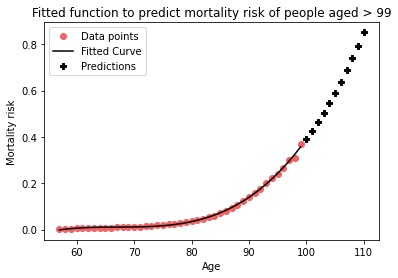

In [13]:
plt.figure()
plt.plot(x, y, 'o', label="Data points", color="#f16364")
plt.plot(x, func(x, *popt), 'k-', label="Fitted Curve")
plt.plot(x_predictions, predictions, 'kP', label="Predictions")
plt.title("Fitted function to predict mortality risk of people aged > 99")
plt.xlabel("Age")
plt.ylabel("Mortality risk")
plt.legend()
plt.savefig("D:/juju/lumc/msc_thesis/report/images/mortalityrisk.png", format="png",  dpi=300, bbox_inches='tight')  
plt.show()

In [14]:
predictions

[0.39026306484420026,
 0.42588971433536216,
 0.4636839543434501,
 0.5037099541291497,
 0.5460318829531516,
 0.5907139100761345,
 0.6378202047587855,
 0.6874149362617903,
 0.7395622738458307,
 0.7943263867715942,
 0.8517714442997679]

https://opendata.cbs.nl/#/CBS/nl/dataset/85089NED/table

In [15]:
life_expectancy = pd.read_csv("D:\juju\lumc\data analyse\Bevolking__kerncijfers_2021_2070_14082022_173702.csv",  sep=";", header=0, decimal=",")

In [16]:
life_expectancy_mean = life_expectancy.loc[life_expectancy["Prognose(-interval)"] == "Prognose"]

In [17]:
life_expectancy_mean[["Perioden", "Periode-levensverwachting/Bij geboorte/Totaal (jaar)"]]

,Perioden,Periode-levensverwachting/Bij geboorte/Totaal (jaar)
0,2021,81.55
1,2022,82.33
2,2023,82.67
3,2024,82.82
4,2025,82.98
5,2026,83.14
6,2027,83.30
7,2028,83.46
8,2029,83.62
9,2030,83.78


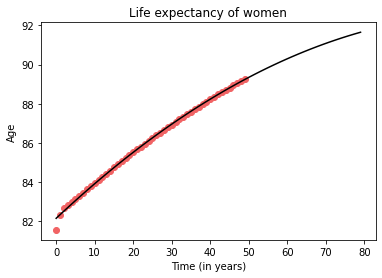

            2
-0.0008177 x + 0.185 x + 82.14


In [18]:
name = ["Dutch", "Turkish", "Moroccan", " Hindustan"]

x = (life_expectancy_mean["Perioden"] -2021)
y=  life_expectancy_mean["Periode-levensverwachting/Bij geboorte/Totaal (jaar)"]
#polynomial fit with degree = 2
model = np.poly1d(np.polyfit(x, y, 2))

#add fitted polynomial line to scatterplot
polyline = np.linspace(min(x), max(x) + 30, 50)
plt.scatter(x, y, color= "#f16364")
plt.plot(polyline, model(polyline), color="black")
plt.title("Life expectancy of women")
plt.xlabel("Time (in years)")
plt.ylabel("Age")
#plt.savefig("D:/juju/lumc/msc_thesis/report/images/growth_formula_" + name[i] +".png", format="png",  dpi=300, bbox_inches='tight')  
plt.show()
print(model)

In [60]:
z = 12
-0.0008177 * z**2 + 0.185 * z+ 82.14

84.2422512

# Growth rate

In [20]:
#find k
growth_rate = np.log(model(80)/model(0))/80
growth_rate

0.0013765806311869483

In [21]:
 0.8646638040804033 * np.exp(-growth_rate*80)

0.774497409477542

I think so? It looks ok?

In [22]:
25//12

2

In [23]:
popt

array([ 1.06948768e-05, -2.15675241e-03,  1.45068422e-01, -3.24393183e+00])

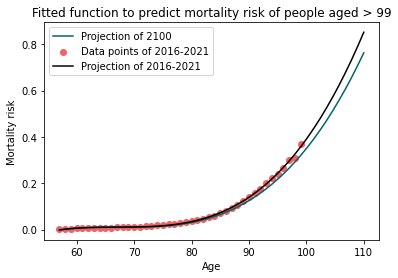

           3            2
1.069e-05 x - 0.002157 x + 0.1451 x - 3.244


In [24]:
x = mortality_risk_df["age"].iloc[45:].astype(float).values
y = mortality_risk_df["kans"].iloc[45:].astype(float).values#polynomial fit with degree = 2
model = np.poly1d(np.polyfit(x, y, 3))

#add fitted polynomial line to scatterplot
polyline = np.linspace(min(x), 110, 50)
plt.plot(polyline, model(polyline)* np.exp(-growth_rate*80), color="#03636C", label="Projection of 2100")
plt.scatter(x, y, color= "#f16364", label="Data points of 2016-2021")
plt.plot(polyline, model(polyline), color="black", label="Projection of 2016-2021")
plt.legend()
plt.title("Fitted function to predict mortality risk of people aged > 99")
plt.xlabel("Age")
plt.ylabel("Mortality risk")
plt.savefig("D:/juju/lumc/msc_thesis/report/images/mortalityrisk_growth rate.png", format="png",  dpi=300, bbox_inches='tight')  
plt.show()
print(model)